In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import wrangle

df = wrangle.get_curriculum_data()
df = wrangle.prepare_datetime_col(df)

Returning saved csv files.


# 3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

### A : The student in the who were in the bottom 25% of number of pings had an average of accessing the curriculum 102 days before the end of thier cohort, and 75% had their last access date 22 days before the end of the cohort.  Therefore it seems likely that the students had left the program without graduating.

- There are in the following cohorts : Sequoia, Teddy, Ulysses, Voyageurs, Yosemite, Xanadu, Zion, Andromeda, 'Betelgeuse', 'Ceres', 'Bayes', 'Deimos', Europa', 'Fortuna', 'Curie', 'Apex', 'Ganymede', 'Hyperion', Darden', 'Bash', 'Jupiter', 'Kalypso', 'Luna', 'Easley', 'Marco', 'Neptune', 'Florence', 'Oberon'
- These are all full stack java and data science cohorts ending inbetween 2018 to 2021
- In looking at the difference between the students last ping and the end date for the cohort, just over half of these students made their last ping ~4 weeks before the end of the cohort, indicating that they may have left.

The graph below shows select cohorts with accesses from the bottom 25% of users hued in orange.  As can be seen, users tended to stop accessing the curriculum before the end of the cohort.

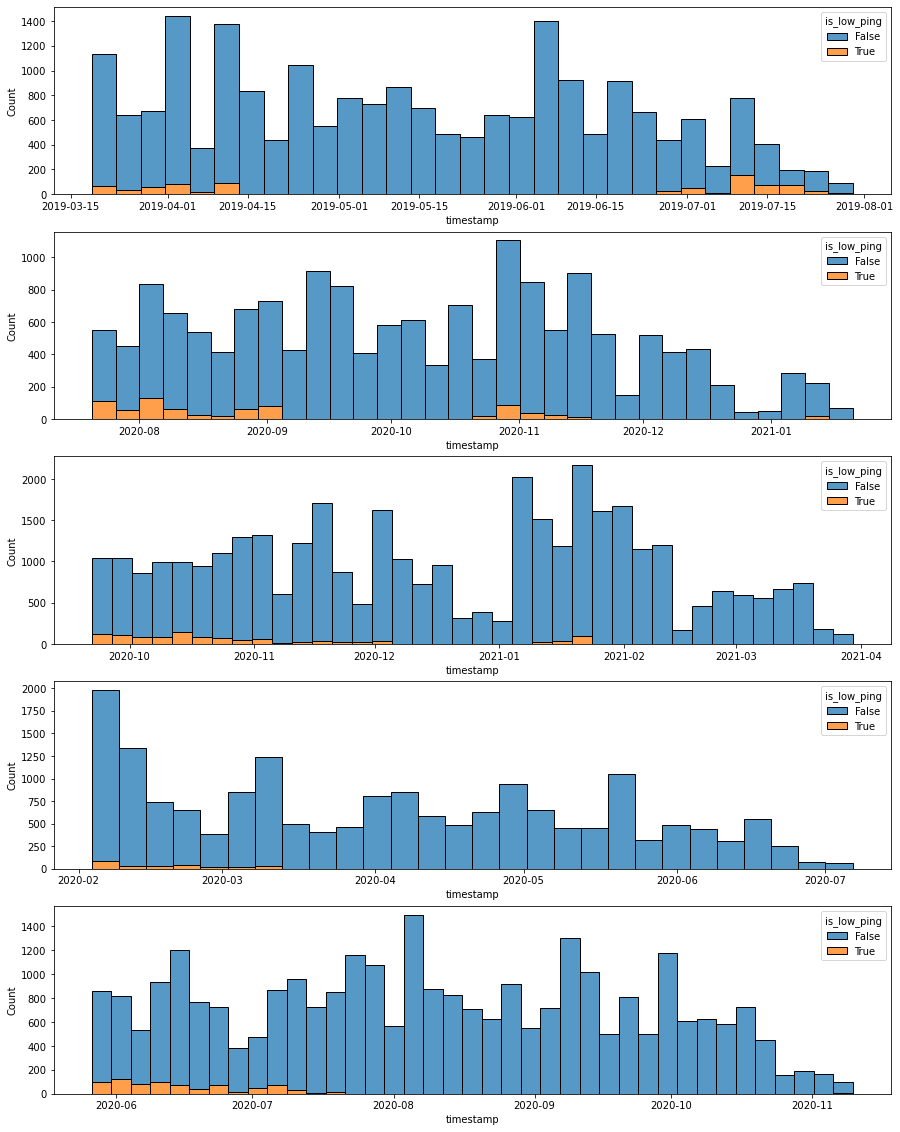

In [9]:
def question_three(df):
    df['start_date'] = pd.to_datetime(df['start_date'])
    df['end_date'] = pd.to_datetime(df['end_date'])
    df = df[~(df.name=='Staff')]
    df = df[(df.timestamp > df.start_date) & (df.timestamp < df.end_date)]
    usercounts = pd.DataFrame(df[['user_id']].value_counts()).rename(columns={0:'count'})
    low_ping_users = usercounts[usercounts['count'] <= df.user_id.value_counts().quantile(0.25)].reset_index()['user_id']
    df['is_low_ping'] = df['user_id'].isin(low_ping_users)
    low_ping_cohorts = df.groupby('name').is_low_ping.count().index.tolist()
    fig, axes = plt.subplots(5,1, figsize = (15,20))
    sns.histplot(data = df[df['name']=='Andromeda'], x='timestamp', hue='is_low_ping', multiple='stack', ax=axes[0])
    sns.histplot(data = df[df['name']=='Bash'], x='timestamp', hue='is_low_ping', multiple='stack',  ax=axes[1])
    sns.histplot(data = df[df['name']=='Jupiter'], x='timestamp', hue='is_low_ping', multiple='stack',  ax=axes[2])
    sns.histplot(data = df[df['name']=='Curie'], x='timestamp', hue='is_low_ping', multiple='stack',  ax=axes[3])
    sns.histplot(data = df[df['name']=='Hyperion'], x='timestamp', hue='is_low_ping', multiple='stack', ax=axes[4])
    plt.show()

question_three(df)

# 4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?

### A:  There is evidence of webscraping.  For example, ip `216.1.153.162` moves through a lot of pages within seconds.  There are a series of user_id that are not associated with any cohort; these could be suspicious-- particularly since some of them seem to be on the wifi.  It could be the case that they could be guests using the network, but there are more nefarious interpretations of this.

- the following user_id are not associated with a cohort : `48,  54,  58,  59,  61,  62,  63,  73,  74,  78,  79,  86,  88, 89, 100, 103, 111, 137, 166, 176, 213, 247, 317, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 372, 375, 403, 406, 429, 544,  64, 713, 714, 715, 716, 717, 718, 663, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 346, 731, 736, 644, 744, 782, 810, 814, 815`
    - some of these are associated only with one ip

- `97.105.19.58` and `97.105.19.61` are likely wifi, but because of the significant traffic and users, it might be worth double checking what these ip addresses are.

The below list of user_id that do not have an associated cohort. These would be worth investigating.

In [3]:
def question_four(df):
    return df[df.program_name == 'unknown_program'].user_id.unique()

question_four(df)

array([ 48,  54,  58,  59,  61,  62,  63,  73,  74,  78,  79,  86,  88,
        89, 100, 103, 111, 137, 166, 176, 213, 247, 317, 349, 350, 351,
       352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364,
       365, 366, 367, 368, 369, 372, 375, 403, 406, 429, 544,  64, 713,
       714, 715, 716, 717, 718, 663, 719, 720, 721, 722, 723, 724, 725,
       726, 727, 728, 729, 346, 731, 736, 644, 744, 782, 810, 814, 815])